# Data Retrieval

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#### Original data set 'Checkouts by title':

In [2]:
spl = pd.read_csv('Checkouts_by_Title.csv')      #Unzip from /Data if needed in the future
spl.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2016,6,1,Capitalism unbound : the incontestable moral c...,"Bernstein, Andrew",Capitalism,"University Press of America,",c2010.
1,Digital,OverDrive,EBOOK,2016,6,2,A Fountain Filled With Blood: Clare Fergusson ...,Julia Spencer-Fleming,"Fiction, Mystery",Macmillan Publishers,2013
2,Physical,Horizon,SOUNDDISC,2016,6,3,And winter came-- [sound recording] / Enya.,Enya,"Christmas music, New Age music, Popular music ...","Reprise,",p2008.
3,Digital,OverDrive,EBOOK,2016,6,1,Simply Sensual,Carly Phillips,"Contemporary Romance, Fiction, Romance","Harlequin Enterprises, Ltd.",2010
4,Physical,Horizon,BOOK,2016,6,33,Lafayette in the somewhat United States / Sara...,"Vowell, Sarah, 1969-",Lafayette Marie Joseph Paul Yves Roch Gilbert ...,"Riverhead Books,",2015.


In [3]:
spl.shape

(33156891, 11)

## Check out items for the year of 2018 only

Make a subset of 2018 entries only:

In [4]:
spl_18 = spl[spl.CheckoutYear == 2018]

In [45]:
# Save subset in a .csv file

#spl_18.to_csv('Data/spl_18.csv', index=False)

In [2]:
data = pd.read_csv('Data/spl_18.csv')

In [3]:
data.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Digital,Freegal,SONG,2018,1,1,Exploding Chimney,The Fall,NaN,NaN,NaN
1,Digital,Freegal,SONG,2018,1,1,"Swing Low, Sweet Chariot",Alex de Grassi,NaN,NaN,NaN
2,Digital,Freegal,SONG,2018,1,1,Fear Not Mary,Will Ackerman;Nick Berry,NaN,NaN,NaN
3,Digital,Freegal,SONG,2018,1,1,Honky Tonk Flame,Tyler Childers,NaN,NaN,NaN
4,Digital,OverDrive,AUDIOBOOK,2018,1,1,The Suitors (Unabridged),Cecile David-Weill,"Fiction, Literature","Blackstone Audio, Inc.",2013


In [4]:
data.tail()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
2665093,Physical,Horizon,BOOK,2018,12,1,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie","Young women Fiction, Grief Fiction","Tyrant Books,",[2017]
2665094,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016
2665095,Physical,Horizon,VIDEODISC,2018,12,7,Like crazy / Paramount Vantage ; Indian Paintb...,NaN,"First loves Drama, College students Drama, Fea...","Paramount Home Entertainment,",[2012]
2665096,Physical,Horizon,BOOK,2018,12,2,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fic...","Pīeichipīkenkyūjo,",2017.
2665097,Physical,Horizon,BOOK,2018,12,1,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",Naruto Fictitious character Comic books strips...,"VIZ Media,",[2014]


## Initial information

In [5]:
data.shape    # 2,665,098 entries

(2665098, 11)

In [6]:
# Data set overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665098 entries, 0 to 2665097
Data columns (total 11 columns):
UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutYear       int64
CheckoutMonth      int64
Checkouts          object
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    object
dtypes: int64(2), object(9)
memory usage: 223.7+ MB


In [7]:
# Making sure all entries are from 2018 

data['CheckoutYear'].value_counts()

2018    2665098
Name: CheckoutYear, dtype: int64

----------
# Data Cleaning

### NaN 

In [8]:
data.isna().sum()

UsageClass              0
CheckoutType            0
MaterialType            0
CheckoutYear            0
CheckoutMonth           0
Checkouts               0
Title                   0
Creator            359404
Subjects            63027
Publisher           49366
PublicationYear     88344
dtype: int64

The vast ammount of NaN values we see here may be due to the combination of records made in 2016, for now I'll make them their own category and evaluate each one later on.

*"There are a few different reasons why you will sometimes find a blank subject headings field. Historic physical checkouts were combined with current Horizon bibliographic record details in December 2016. If there was not a Horizon bibliographic record for a title as of December 2016, a subject heading was not recorded.
Also, some digital items have no Horizon bibliographic record. For example, music from Freegal is not cataloged within Horizon. Thus there will be no subject headings available for those checkouts."*

In [9]:
# Creators column

data.Creator.replace(np.nan, 'Unknown', inplace=True)

In [10]:
# Subjects column

data.Subjects.replace(np.nan, 'Unknown', inplace=True)

In [11]:
# Publisher column

data.Publisher.replace(np.nan, 'Unknown', inplace=True)

In [12]:
# PublicationYear column

data.PublicationYear.replace(np.nan, 'Unknown', inplace=True)

In [13]:
data.isna().sum()

UsageClass         0
CheckoutType       0
MaterialType       0
CheckoutYear       0
CheckoutMonth      0
Checkouts          0
Title              0
Creator            0
Subjects           0
Publisher          0
PublicationYear    0
dtype: int64

#### Remove CheckoputYear column since we are working only with year 2018

In [14]:
data.drop(labels='CheckoutYear', axis=1, inplace=True)

In [15]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665098 entries, 0 to 2665097
Data columns (total 10 columns):
UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutMonth      int64
Checkouts          object
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    object
dtypes: int64(1), object(9)
memory usage: 203.3+ MB


### Familiarize with each column

In [17]:
# UsageClass 	Denotes if item is “physical” or “digital”

data['UsageClass'].unique()

array(['Digital', 'Physical'], dtype=object)

In [18]:
# CheckoutType 	Denotes the vendor tool used to check out the item

data['CheckoutType'].unique()

array(['Freegal', 'OverDrive', 'Horizon', 'Hoopla', 'Zinio'], dtype=object)

* Freegal: stream and download songs
* OverDrive: access e-books and audiobooks
* Horizon: information portal used by the library previously
* Hoopla: stream movies or TV shows
* Zinio: digital magazines

In [19]:
data['CheckoutType'].value_counts()

Horizon      1698680
OverDrive     881868
Freegal        44455
Hoopla         38783
Zinio           1312
Name: CheckoutType, dtype: int64

In [20]:
# MaterialType 	Describes the type of item checked out (examples: book, song movie, music, magazine)

data['MaterialType'].value_counts()

BOOK                                          1222642
EBOOK                                          618983
AUDIOBOOK                                      261035
VIDEODISC                                      233007
SOUNDDISC                                      226107
SONG                                            44455
MUSIC                                           18500
TELEVISION                                       9566
MOVIE                                            9044
COMIC                                            8012
REGPRINT                                         2751
SOUNDDISC, VIDEODISC                             2355
VIDEO                                            1850
MAGAZINE                                         1312
SOUNDREC                                         1256
CR                                               1057
ER                                                851
ER, SOUNDDISC                                     693
ER, VIDEODISC               

Here I will move the types with single digits to a general classification of similar type. Since there are not many entries I check SPL catalog and make sure the items are in the correct category.
The type ER corresponds to formats that are print + media; so they are grouped into one sinsgle category.

In [21]:
data.loc[data['MaterialType'] == 'SOUNDCASS, SOUNDDISC, VIDEOCASS, VIDEODISC', 'MaterialType'] = 'SONG'
data.loc[data['MaterialType'] == 'NONPROJGRAPH', 'MaterialType'] = 'SONG'
data.loc[data['MaterialType'] == 'PICTURE', 'MaterialType'] = 'SONG'

In [23]:
data.loc[data['MaterialType'] == 'SOUNDDISC, VIDEOCASS', 'MaterialType'] = 'SOUNDDISC, VIDEODISC'

In [25]:
data.loc[data['MaterialType'] == 'COMPFILE', 'MaterialType'] = 'BOOK'
data.loc[data['MaterialType'] == 'FLASHCARD', 'MaterialType'] = 'BOOK'
data.loc[data['MaterialType'] == 'SOUNDCASS, SOUNDDISC', 'MaterialType'] = 'SOUNDDISC'
data.loc[data['MaterialType'] == 'VIDEOCASS, VIDEODISC', 'MaterialType'] = 'VIDEODISC'

In [27]:
#ER Book/Print + Media
data.loc[data['MaterialType'] == 'ER, SOUNDDISC', 'MaterialType'] = 'ER'
data.loc[data['MaterialType'] == 'ER, VIDEODISC', 'MaterialType'] = 'ER'
data.loc[data['MaterialType'] == 'ER, NONPROJGRAPH', 'MaterialType'] = 'ER'
data.loc[data['MaterialType'] == 'ER, PRINT', 'MaterialType'] = 'ER'
data.loc[data['MaterialType'] == 'ER, REGPRINT', 'MaterialType'] = 'ER'

In [30]:
# Remove Mixed type: SPL HotSpot Wireless and Laptop conection

data.loc[data.MaterialType == 'MIXED']

,UsageClass,CheckoutType,MaterialType,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
99840,Physical,Horizon,MIXED,1,7,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
101444,Physical,Horizon,MIXED,1,"1,175",In Building Device Checkout,Unknown,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
154849,Physical,Horizon,MIXED,1,673,SPL HotSpot : connecting Seattle / [distribute...,Unknown,"Wireless LANs, Wireless Internet, Wireless com...","Verizon Wireless,",©2014.
160045,Physical,Horizon,MIXED,1,31,Kill A Watt [electricity monitor] : model P440...,Unknown,"Electricity, Electric power Conservation, Ener...","P3 International Corporation,",[2008?].
255342,Physical,Horizon,MIXED,2,581,SPL HotSpot : connecting Seattle / [distribute...,Unknown,"Wireless LANs, Wireless Internet, Wireless com...","Verizon Wireless,",©2014.
275389,Physical,Horizon,MIXED,2,26,Kill A Watt [electricity monitor] : model P440...,Unknown,"Electricity, Electric power Conservation, Ener...","P3 International Corporation,",[2008?].
302447,Physical,Horizon,MIXED,2,5,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
450315,Physical,Horizon,MIXED,2,"1,140",In Building Device Checkout,Unknown,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
491864,Physical,Horizon,MIXED,3,"1,195",In Building Device Checkout,Unknown,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
539454,Physical,Horizon,MIXED,3,9,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]


In [31]:
data.loc[data.Title == 'Goodnight moon / Margaret Wise Brown.']

,UsageClass,CheckoutType,MaterialType,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
99840,Physical,Horizon,MIXED,1,7,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
302447,Physical,Horizon,MIXED,2,5,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
539454,Physical,Horizon,MIXED,3,9,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
701839,Physical,Horizon,SOUNDDISC,3,1,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Childrens songs,"Weston Woods,","[2004, c1975]"
767406,Physical,Horizon,MIXED,4,9,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
1111388,Physical,Horizon,MIXED,5,4,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
1183035,Physical,Horizon,MIXED,6,2,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
1524431,Physical,Horizon,MIXED,7,5,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]
1603299,Physical,Horizon,SOUNDDISC,8,1,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Childrens songs,"Weston Woods,","[2004, c1975]"
1756327,Physical,Horizon,MIXED,8,11,Goodnight moon / Margaret Wise Brown.,"Brown, Margaret Wise, 1910-1952",Bedtime Juvenile fiction,"HarperChildren'sAudio,",[1989]


In [32]:
# Move items that don't belong to MIXED Category

data.loc[data['Title'] == 'Goodnight moon / Margaret Wise Brown.', 'MaterialType'] = 'SOUNDDISC'

In [33]:
# Drop rows taht contain MIXED type

data.drop(data[data.MaterialType == 'MIXED'].index, inplace=True)

In [34]:
data['MaterialType'].value_counts()

BOOK                    1222646
EBOOK                    618983
AUDIOBOOK                261035
VIDEODISC                233011
SOUNDDISC                226122
SONG                      44458
MUSIC                     18500
TELEVISION                 9566
MOVIE                      9044
COMIC                      8012
REGPRINT                   2751
SOUNDDISC, VIDEODISC       2357
ER                         1906
VIDEO                      1850
MAGAZINE                   1312
SOUNDREC                   1256
CR                         1057
LARGEPRINT                  262
ATLAS                       216
MAP                         199
VIDEOCASS                   107
VISUAL                       80
MUSICSNDREC                  55
UNSPECIFIED                  48
SOUNDCASS                    46
REGPRINT, SOUNDDISC          39
VIDEOCART                    25
MICROFORM                    20
FLASHCARD, SOUNDDISC         16
VIDEOREC                     16
REGPRINT, VIDEOREC           12
NOTATEDM

In [35]:
# CheckoutMonth 	The month of checkout for this record

data['CheckoutMonth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [37]:
# Checkouts 	A count of the number of times the title was checked out within the “Checkout Month”

data['Checkouts'].unique();

In [38]:
data['Checkouts'].dtypes

dtype('O')

In [39]:
# Convert to numeric type

data['Checkouts'] = pd.to_numeric(data['Checkouts'], errors='coerce')

In [40]:
# Check again for null values

data['Checkouts'].isna().sum()

2

In [48]:
# Drop 2 rows 

data['Checkouts'].dropna(inplace=True);

In [49]:
# check again

data['Checkouts'].isna().sum()

0

In [50]:
data['Checkouts'].unique()

array([  1.,   2.,  14.,   4.,   5.,   3.,   6.,   7.,  11.,  10.,  34.,
        19.,   9.,  35.,  16.,  64.,  21.,   8.,  13.,  12.,  30.,  17.,
        20.,  22.,  18.,  15.,  79.,  50.,  61.,  32.,  95.,  23.,  24.,
        71.,  38.,  29.,  43.,  44.,  25.,  39.,  28.,  26.,  65., 105.,
        56.,  42.,  58.,  84.,  51., 106.,  81.,  27.,  82.,  62.,  66.,
        46.,  57.,  41., 114.,  59.,  86.,  85., 540.,  89.,  80.,  78.,
        76.,  60.,  55.,  54., 176.,  47.,  31.,  40., 354.,  48., 495.,
        37., 282., 119., 141., 251., 102., 143.,  49.,  63.,  87.,  33.,
       179.,  70.,  99.,  52.,  92.,  53.,  68.,  45.,  72., 122., 123.,
       667., 117.,  97.,  96., 121., 183., 241.,  36., 157., 277., 130.,
       568., 110.,  90.,  77., 100., 601., 158., 200., 136., 187., 479.,
       399.,  75.,  67., 284., 170., 132., 164.,  73., 551., 142.,  69.,
       155., 185., 103., 156., 138., 627.,  83., 267.,  93., 586., 109.,
       654., 124., 107., 543., 134., 108.,  88., 10

In [51]:
# Creator	The author or entity responsible for authoring the item

data['Creator'].unique()

array(['The Fall', 'Alex de Grassi', 'Will Ackerman;Nick Berry', ...,
       'Pabich, Wendy J.', 'A. S. Patric', 'Furneaux, Rupert'],
      dtype=object)

In [52]:
# PublicationYear	The year from the catalog record in which the item was published, printed, or copyrighted. 

data['PublicationYear'].unique()

array(['Unknown', '2013', '2017', ..., '2005, ©1986.', '1900-1964.',
       '2004, ©2000.'], dtype=object)

In [53]:
# Confirm all data types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665057 entries, 0 to 2665097
Data columns (total 10 columns):
UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutMonth      int64
Checkouts          float64
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    object
dtypes: float64(1), int64(1), object(8)
memory usage: 303.7+ MB


In [54]:
data.head(10)

,UsageClass,CheckoutType,MaterialType,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Digital,Freegal,SONG,1,1.0,Exploding Chimney,The Fall,Unknown,Unknown,Unknown
1,Digital,Freegal,SONG,1,1.0,"Swing Low, Sweet Chariot",Alex de Grassi,Unknown,Unknown,Unknown
2,Digital,Freegal,SONG,1,1.0,Fear Not Mary,Will Ackerman;Nick Berry,Unknown,Unknown,Unknown
3,Digital,Freegal,SONG,1,1.0,Honky Tonk Flame,Tyler Childers,Unknown,Unknown,Unknown
4,Digital,OverDrive,AUDIOBOOK,1,1.0,The Suitors (Unabridged),Cecile David-Weill,"Fiction, Literature","Blackstone Audio, Inc.",2013
5,Digital,OverDrive,EBOOK,1,2.0,Augustown: A Novel,Kei Miller,"Fiction, Literature","Random House, Inc.",2017
6,Physical,Horizon,BOOK,1,1.0,Crochet : step by step / Sally Harding.,"Harding, Sally",Crocheting Technique,"Dk Publishing,",2013.
7,Digital,OverDrive,EBOOK,1,2.0,Days with Frog and Toad,Arnold Lobel,Juvenile Fiction,HarperCollins Publishers Inc.,2009
8,Digital,OverDrive,EBOOK,1,1.0,Joseph Andrews/Shamela,Henry Fielding,"Fiction, Short Stories","Penguin Group (USA), Inc.",2011
9,Digital,OverDrive,EBOOK,1,2.0,God's Gift,Dee Henderson,"Christian Fiction, Fiction, Romance","Harlequin Enterprises, Ltd.",2014


At this point I save a clean version of the data for future use.

In [55]:
#data.to_csv('Data/data_clean.csv', index=False)

--------
# Exploration

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =  pd.read_csv('Data/data_clean.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665057 entries, 0 to 2665056
Data columns (total 10 columns):
UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutMonth      int64
Checkouts          float64
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    object
dtypes: float64(1), int64(1), object(8)
memory usage: 203.3+ MB


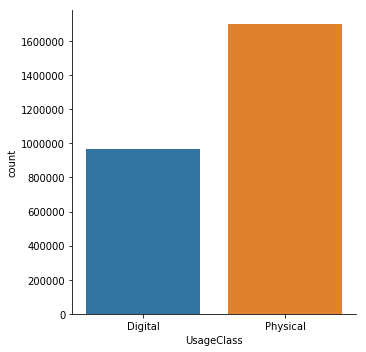

In [5]:
sns.catplot(x="UsageClass", kind="count", data=data);

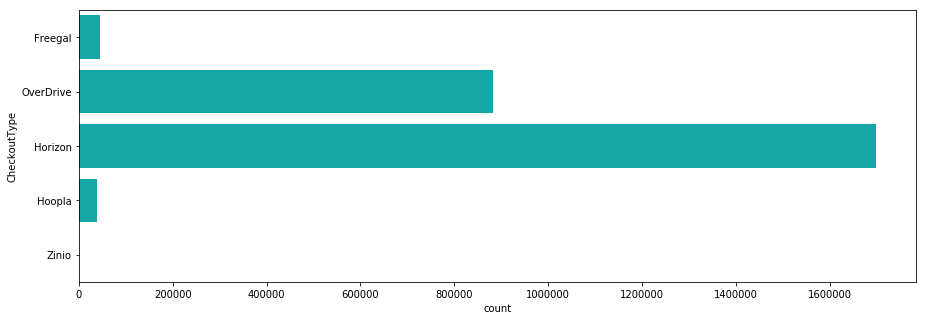

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(y="CheckoutType", data=data, color="c");

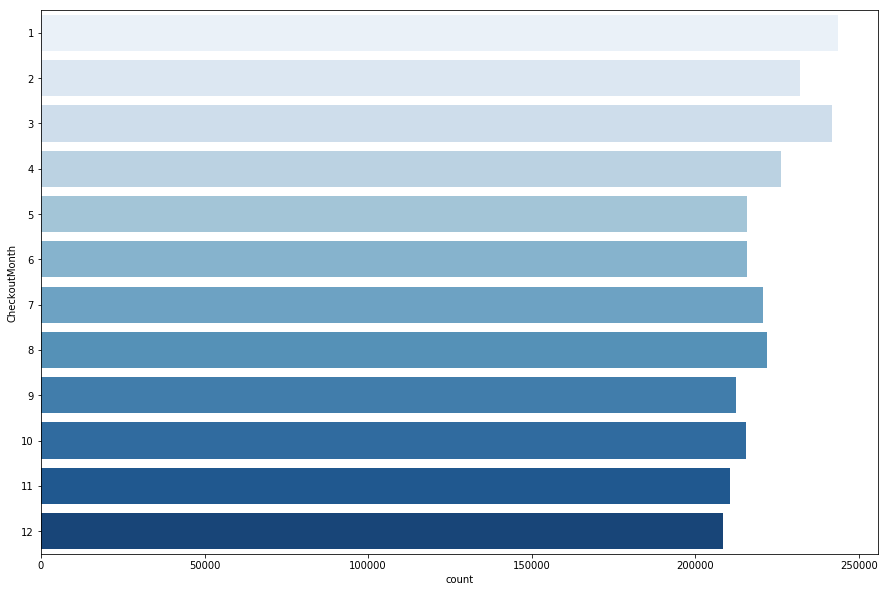

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(y="CheckoutMonth", data=data, palette='Blues');

In [8]:
# 25 most checkout titles by month

data['Checkouts'] = pd.to_numeric(data['Checkouts'], errors='coerce')
sorted_checkouts = data.sort_values('Checkouts', ascending=False)
sorted_checkouts.head(25)

,UsageClass,CheckoutType,MaterialType,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
2233873,Physical,Horizon,BOOK,10,847.0,Fear : Trump in the White House / Bob Woodward.,"Woodward, Bob, 1943-","Trump Donald 1946, United States Politics and ...","Simon & Schuster,",2018.
519771,Physical,Horizon,BOOK,3,766.0,Fire and fury : inside the Trump White House /...,"Wolff, Michael, 1953-","Trump Donald 1946, Bannon Stephen K, President...","Henry Holt and Company,",2018.
2538342,Physical,Horizon,BOOK,12,735.0,Becoming / Michelle Obama.,"Obama, Michelle, 1964-","Obama Michelle 1964, Presidents spouses United...","Crown,",[2018]
2436853,Digital,OverDrive,AUDIOBOOK,11,716.0,The Red Pencil (Unabridged),Andrea Davis Pinkney,"Juvenile Fiction, Juvenile Literature",Hachette Audio,2014
2344666,Physical,Horizon,BOOK,11,691.0,Fear : Trump in the White House / Bob Woodward.,"Woodward, Bob, 1943-","Trump Donald 1946, United States Politics and ...","Simon & Schuster,",2018.
2428767,Physical,Horizon,BOOK,11,687.0,Dark sacred night / Michael Connelly.,"Connelly, Michael, 1956-","Bosch Harry Fiction, Policewomen Fiction, Cold...","Little, Brown and Company,",2018.
415846,Physical,Horizon,BOOK,2,684.0,Fire and fury : inside the Trump White House /...,"Wolff, Michael, 1953-","Trump Donald 1946, Bannon Stephen K, President...","Henry Holt and Company,",2018.
1074632,Physical,Horizon,BOOK,5,671.0,"A higher loyalty : truth, lies, and leadership...","Comey, James B., Jr., 1960-","Comey James B Jr 1960, United States Federal B...","Flatiron Books,",2018.
754838,Physical,Horizon,BOOK,4,669.0,Fire and fury : inside the Trump White House /...,"Wolff, Michael, 1953-","Trump Donald 1946, Bannon Stephen K, President...","Henry Holt and Company,",2018.
207030,Physical,Horizon,BOOK,1,668.0,Manhattan Beach : a novel / Jennifer Egan.,"Egan, Jennifer","Young women New York State New York Fiction, W...","Scribner,",2017.
